At minimum, one notebook using Finesse 2
  and Pykat to load/parse the file, pretune, add locks,
  optionally add DC offset and plot a quantum-limited
  sensitivity curve.

In [5]:
from pykat import finesse
import advplus as adv
import plot

## 1. Load/parse the common file

In [2]:
ks_path = "../../src/finesse_virgo/katscript/legacy/"

# We'll use the `advplus` package to load the common file
base = finesse.kat()
base = adv.make_kat(katfile=ks_path+"virgo_common_file_f2.kat", keepComments=True, preserveConstants=True)

# Set maxtem to off for this notebook
base.maxtem = -1

# Set Gouy phase management method
base.phase = 3


Pykat parsing does not preserve inline comments. Moving inline
comments before command



## 2. Pretune

In [3]:
# Adjust recycling cavity length to match modulaton frequencies
base.IFO.adjust_PRC_length(verbose=True)
base.IFO.adjust_SRC_length(verbose=True)
base.IFO.lengths_status()

-- adjusting PRC length
   adusting kat.lPOP_B5.L by 0.000473597m
-- adjusting SRC length
   adusting kat.lsr.L by 0.000882965m
 .--------------------------------------------------.
| - Arm lengths [m]:                                |
| Ln   = 2999.8180   Lw  = 2999.7880                |
| - Michelson and recycling lengths [m]:            | 
| ln   = 6.0152      lw  = 5.7851                   |
| lpr  = 6.0518      lsr  = 6.0518                  |
| lMI  = 5.9001      lSchnupp = 0.2301              |
| lPRC = 11.9520     lSRC = 11.9520                 |
+---------------------------------------------------+
| - Associated cavity frequencies [Hz]:             |
| fsrx   = 49968.44   ,    fsry = 49968.94          |
| fsrPRC = 12541554.00, fsrSRC = 12541554.00        |
| - Modulation sideband frequencies [MHz]:          |
| f1     = 6.270777    ,   f2   = 56.436993         |
| f3     = 8.361036                                 |
 +--------------------------------------------------'
| - Che

In [4]:
# Pretune using DC powers
adv.pretune(base, 1e-8, verbose=True)
adv.pretune_status(base)

-- pretuning interferometer to precision 1e-08 deg = 2.95556e-17 m
   scanning X arm (maximising power)
   found max/min at: -1e-08 (precision = 1.02516e-09)
   scanning Y arm (maximising power)
   found max/min at: -1e-08 (precision = 1.02516e-09)
   scanning MICH (minimising power)
   found max/min at: 0 (precision = 2.27813e-08)
   scanning PRCL (maximising power)
   found max/min at: -2.85e-06 (precision = 6.83438e-08)
   scanning SRCL (maximising carrier power, then adding 90 deg)
   found max/min at: -89.99999773 (precision = 7.59375e-09)
   ... done
 .---------------------------------------------------.
 | pretuned for maxtem = off, phase =  3             |
 .---------------------------------------------------.
 | port    power[W] pow. ratio | optics   tunings    |
 +-----------------------------|---------------------+
 | PowN  :  2.46e+05      6150 | PR    : -2.85e-06   |
 | PowW  : 2.452e+05      6130 | NI    :         0   |
 | PowBS :      1736      43.4 | NE    :    -1e-08  

## 3. Add Locks

In [5]:
base.IFO.add_locks_block({
    "DARM": {"accuracy":1.0, "gain":1.0},
    "CARM": {"accuracy":1.0, "gain":1.0},
    "PRCL": {"accuracy":1.0, "gain":1.0},
    "MICH": {"accuracy":1.0, "gain":1.0},
    "SRCL": {"accuracy":1.0, "gain":1.0},
});

## 4. Add a DC Offset

In [7]:
DCoffset = base.IFO.find_DC_offset(4e-3, offset_type = 'DARM', verbose =True);

print(DCoffset)

   finding DARM DC offset for AS power of 0.004 W
   starting peak search...
Optimization terminated successfully.
         Current function value: 0.000005
         Iterations: 10
         Function evaluations: 20
   ... done
   DC offset for B1 = 0.004 W is: 4.453e-04 deg
0.000445


## 5. Plot a Quantum-Limited Sensitivity Curve

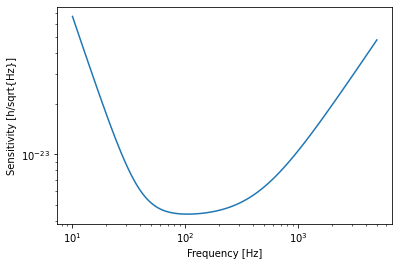

In [8]:
plot.strain_sensitivity(base)